# Сборный проект №1. Интернет-магазин Стримчик: исследовательский анализ данных и проверка гипотез.

Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st


## Ознакомление с данными

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
pd.set_option('display.max_columns', None)
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Описание данных:

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# проверим пропуски
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# строки с пропусками в названии игры
games[games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


При необходимости, можно удалить строки с пропусками в имени (а заодно и в жанре). Данные не существенны, относятся к 1993 году.

Пропуски в годах заменить нечем, но, возможно, удалять не надо, лучше взять для анализа выборку по годам с наиболее полными данными.
Оценок и рейтинга нет в существенной части данных, необходимо дополнительно проанализировать.

In [7]:
# ознакомимся с платформами
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [8]:
# количественное распределение значений по годам
games.groupby('Year_of_Release', dropna=False).count()

,Name,Platform,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
Year_of_Release,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,0,0,0
1981.0,46,46,46,46,46,46,46,0,0,0
1982.0,36,36,36,36,36,36,36,0,0,0
1983.0,17,17,17,17,17,17,17,0,0,0
1984.0,14,14,14,14,14,14,14,0,0,0
1985.0,14,14,14,14,14,14,14,1,1,1
1986.0,21,21,21,21,21,21,21,0,0,0
1987.0,16,16,16,16,16,16,16,0,0,0
1988.0,15,15,15,15,15,15,15,1,1,1


Значения в столбце Year_of_Release необходимо перевести в int, поскольку они целочисленные. Для этого придется удалить 269 пропусков. Можно было бы заменить часть из них на дату релиза на других платформах, но они могут добавляться в разные годы - возможно, поэтому и возникли пропуски. Такие данные только исказят картину, хотя их и несущественное количество, которым можно пожертвовать.

In [9]:
# ознакомимся с жанрами
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
# ознакомимся с оценками критиков
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Значения в столбце Critic_Score фактически должны быть целочисленными, но из-за пропусков остается формат float

In [11]:
# ознакомимся с оценками пользователей 
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди оценок пользователей есть значение 'tbd'. Это сленговая аббревиатура, по одной из версий расшифровывается как To Be Determined - "Предстоит определить". Иными словами, рейтинг еще не посчитали для каких-то игр. Если приравнять к отсутствию рейтинга, можно заменить формат данных на float, поскольку используются вещественные числа.

In [12]:
# ознакомимся с рейтингом
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

E Для всех

T Подросткам (от 13 лет)

M Для взрослых (от 17 лет)

E10+ Для всех от 10 лет и старше

EC - Для детей младшего возраста (от 3 лет)

K-A Для всех от 6 лет и старше

RP Рейтинг ожидается

AO Только для взрослых (от 18 лет)


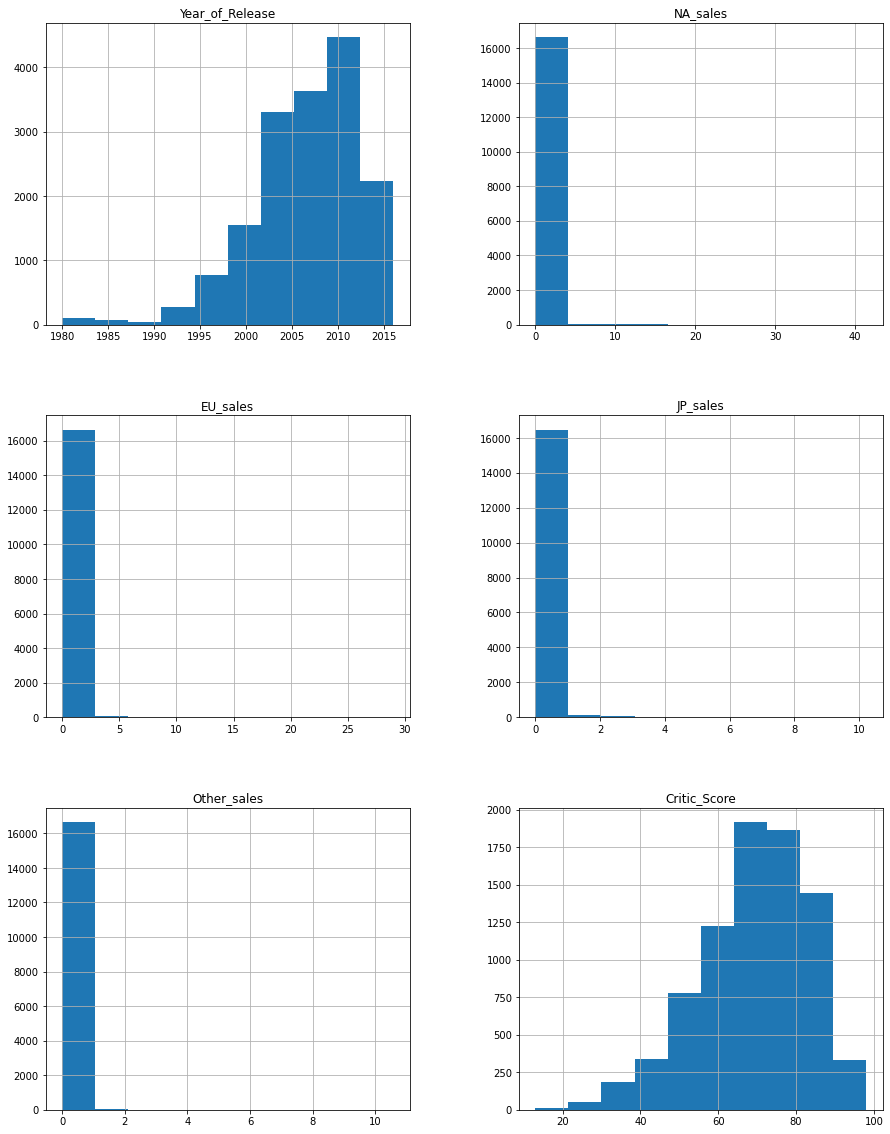

In [13]:
# ознакомимся с графиками по количественным значениям
games.hist(bins=10, figsize=(15, 20));

### **Выводы по разделу 1**

**Name и Genre** - 2 пропуска по одним и тем же строкам, относятся к 1993 году. Наиболее популярные жанры по выпуску игр: Action (3369), Sports (2348), Misc (1750), Role-Playing (1498), Shooter (1323), Adventure (1303), Racing (1249).

**Platform** - нет пропусков. Более тысячи игр на платформах: PS2 (2161), DS (2151), PS3 (1331), Wii (1320), X360 (1262), PSP (1209), PS (1197).

**Year_of_Release** - 269 пропусков, несущественно в рамках выборки, можно удалить. Необходимо поменять формат данных на int. Наибольшее количество данных имеется за период с 2007 по 2010 гг.

**NA_sales** - нет пропусков. Выручка по игре в Северной Америке в пределах 5 млн.

**EU_sales** - нет пропусков. Выручка по игре в Европе в пределах 2.5 млн.

**JP_sales** - нет пропусков. Выручка по игре в Японии в пределах 1 млн.

**Other_sales** - нет пропусков. Основные продажи в пределах 1 млн.

**Critic_Score** - 8578 пропусков. 

**User_Score** - 6701 пропусков. Среди оценок пользователей есть значение 'tbd'. Наиболее вероятно, что рейтинг еще не посчитали для каких-то игр. Его можно приравнять к отсутствующему и поменять формат на float.

**Rating** - 6766 пропусков, существенная часть данных. Наиболее популярные рейтинги: E - Для всех (3990), T - Подросткам (от 13 лет) (2961), M - Для взрослых (от 17 лет) (1563), E10+ - Для всех от 10 лет и старше (1420). 


## Предобработка данных

### Приведем наименования столбцов к нижнему регистру

In [14]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Удалим пропуски и преобразуем данные в нужные типы

In [15]:
games = games[pd.notnull(games['name'])]
games['name'].isna().sum()

0

In [16]:
games['genre'].isna().sum()

0

Удалили 2 строки с отсутствующим названием игры и жанра.

In [17]:
games = games[pd.notnull(games['year_of_release'])]
games['year_of_release'].isna().sum() 

0

In [18]:
games['year_of_release'] = games['year_of_release'].astype('int32')

Удалили строки с отсутствующим годом релиза и перевели значения в целочисленные для удобства.

In [19]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN 

In [20]:
games['user_score'] = games['user_score'].astype('float64')

Заменили значение 'tbd' на Nan. Формат данных изменили на вещественный, так как значения с плавающей точкой.

In [21]:
(
    games.query('year_of_release <= 2005')['year_of_release'].count() - 
    games.query('year_of_release <= 2005')['rating'].count()
)

2947

In [22]:
(
    games.query('2005 < year_of_release < 2013')['year_of_release'].count() - 
    games.query('2005 < year_of_release < 2013')['rating'].count()
)

2752

In [23]:
(
    games.query('platform == "PSP"')['platform'].count() - 
    games.query('platform == "PSP"')['rating'].count()
)

657

In [24]:
(
    games['jp_sales'].sum() - 
    games.query('rating.isna()')['jp_sales'].sum()
)

453.9

In [25]:
games.query('rating.isna()')['jp_sales'].sum()

836.7399999999999

Пропуски в столбце с рейтингом сложно объяснить, поскольку он обязательно должен быть, чтобы игру выпустили на платформе. Также нельзя сказать, что пропуски относятся к старым, не таким строгим, временам - на самый активный период продаж видеоигр приходится почти половина пропусков. 

Возможно, разница в том, что часть игр проходила маркировку не по ESRB, а по региональным стандартам - PEGI в Европе или CERO в Японии. К примеру, продажи в Японии на 2/3 состоят из игр без рейтинга.

Чтобы не оставлять пустых значений, заменим их на not defined (не определено).

In [26]:
games['rating'] = games['rating'].fillna('not defined')

### Проверим дубликаты

In [27]:
games.duplicated().sum()

0

Явных дубликатов нет

In [28]:
len(games['name'].unique())

11426

In [29]:
len(games['name'].str.lower().unique())


11426

Дубликатов в наименоваии игр из-за разного регистра не обнаружено.

### Создадим отдельный столбец для суммарных продаж во всех регионах

In [30]:
#games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Выведем получившуюся таблицу и информацию

In [31]:
display(games)
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not defined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,not defined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,not defined,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [32]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

### **Выводы по разделу 2**

1. Привели наименования столбцов к нижнему регистру.

2. **name и genre**. Удалили строки с пустыми значениями по столбцам. 

3. **year_of_release**. Удалили строки с отсутствующим годом релиза и перевели значения в целочисленные.

4. **user_score**. Заменили значение 'tbd' на Nan. Формат данных изменили на вещественный.

Пропуски в оценках не были заполнены во избежание искажения при анализе и отсутствии разумной альтернативы. Можно было бы заполнить медианой по жанрам, но то, что оценка отсутствует, может иметь разные причины - как то, что игра выпустилась до 1996 года и тогда оценки практически не проставлялись, либо что игра настолько непопулярна, что ее никто не оценивал.

5. **rating**. Предположили, что часть игр проходила маркировку не по ESRB, а по региональным стандартам - PEGI в Европе или CERO в Японии. Пропуски заменили на значение not defined.

6. Дубликаты не обнаружили.

7. **total_sales**. Добавили столбец с суммарной выручкой.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

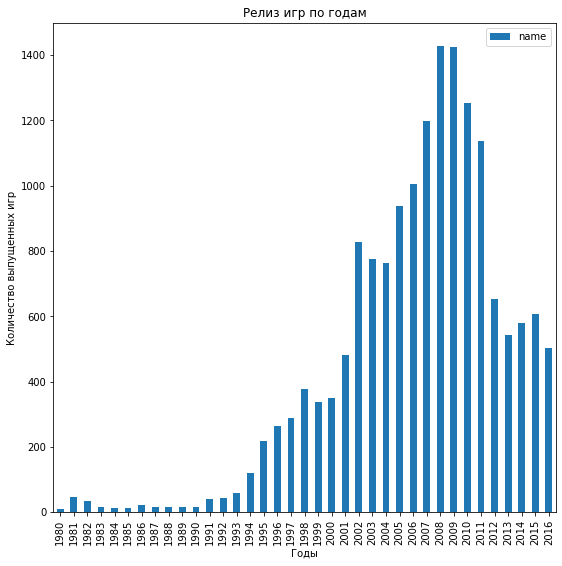

In [33]:
games_per_year = (games.pivot_table(index='year_of_release', values='name', aggfunc='count')
                  .sort_values('year_of_release', ascending=True))
games_per_year.plot(kind='bar', legend=True, title='Релиз игр по годам', figsize=(9,9))

plt.xlabel("Годы");
plt.ylabel("Количество выпущенных игр");


В 80-е гг видео-игр выпускалось мало, информации о них дошло до наших дней еще меньше. В 90-е индустрия начинает развиваться, входят в моду консоли, а с 2000 начинает приходить в дома интернет, вместе с которым начинается бум видео-игр. Наибольший выпуск игр приходится на период 2006 - 2010 гг. Потом у пользователей появились фавориты, для которых стали выпускать обновления, а новых игр стали придумывать меньше.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

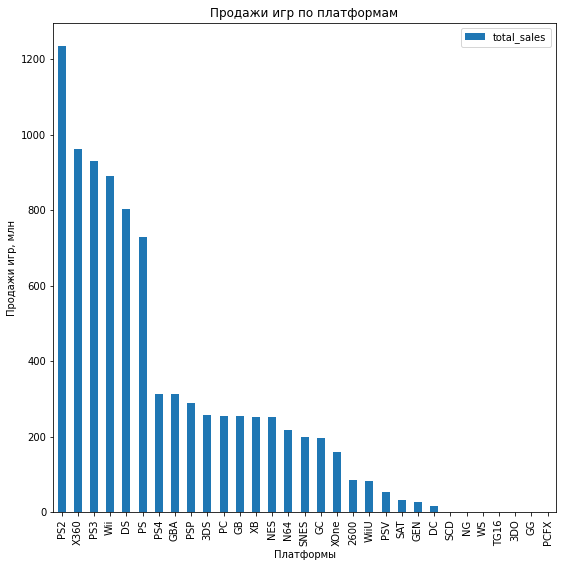

In [34]:
sales_per_platform = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values('total_sales', ascending=False))
sales_per_platform.columns = ['total_sales']
sales_per_platform.plot(kind='bar', legend=True, title='Продажи игр по платформам', figsize=(9,9))

plt.xlabel("Платформы");
plt.ylabel("Продажи игр, млн");


In [35]:
platforms_top_5 = sales_per_platform.head()
platforms_top_5

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


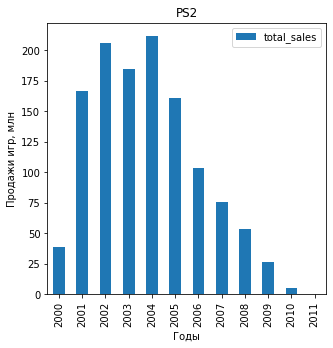

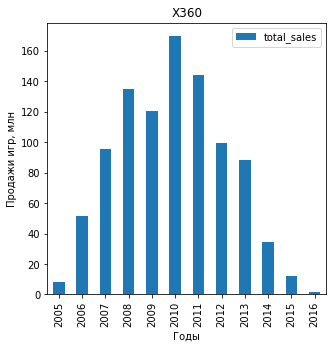

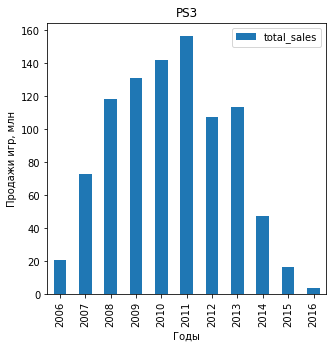

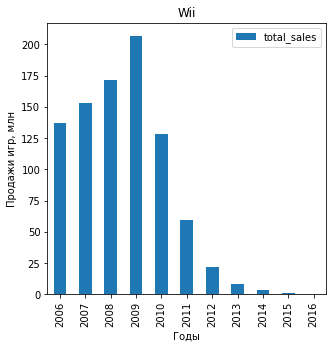

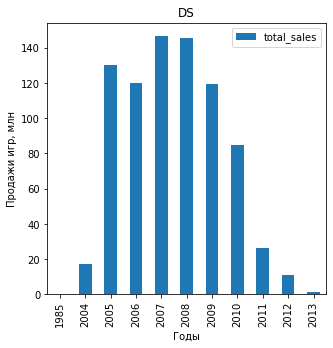

In [36]:
# построим распределения по годам для каждой платформы.
for p in list(platforms_top_5.index):
    games[games['platform'] == p].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(5, 5))
    plt.title(p)
    plt.xlabel("Годы");
    plt.ylabel("Продажи игр, млн");                        

Из графиков видно, что наибольшие продажи пришлись на период 2000-х:

- PS2 - период 2000-2010 гг
- X360 - период 2005-2016 гг
- PS3 - период 2006-2016 гг
- Wii - период 2006-2015 гг
- DS - период 2004-2013 гг

Можно сделать вывод, что платформа устаревает за 9-11 лет. Пиковые показатели приходятся на 4-6-й год существования.

При этом в общей таблице больше всего игр выпускалось в период 2005-2011 гг, в дальнейшем спад по платформам связан не только с их собственной популярностью, но и с глобальной тенденцией по сокращению релизов. Тогда для прогнозирования показателей на 2017 год нужно взять период, приближающейся к крайней точке с большим количеством данных, но включающий в себя не более 5 лет.

В дальнейшем анализе будем использовать данные за 2012-2016 гг.

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [37]:
# создадим новый дф, только за актуальный период
games_act = games[games['year_of_release']>=2012]
games_act
#games_act.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,not defined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not defined,0.01


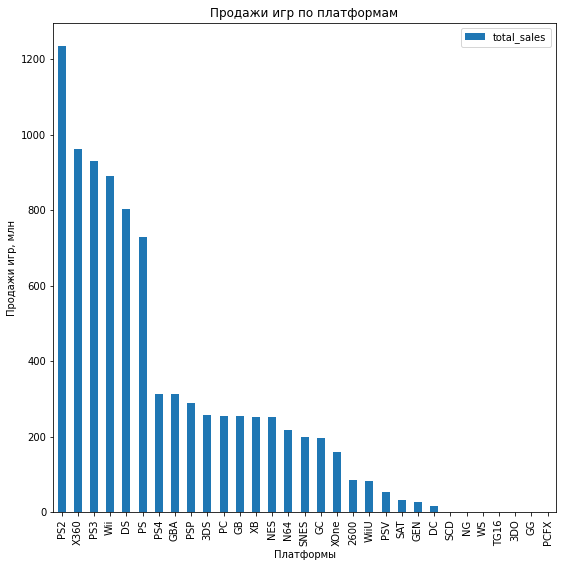

In [38]:
# продажи по платформам за актуальный период
sales_per_platform_act = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values('total_sales', ascending=False))

sales_per_platform_act.plot(kind='bar', legend=True, title='Продажи игр по платформам', figsize=(9,9))

plt.xlabel("Платформы");
plt.ylabel("Продажи игр, млн");

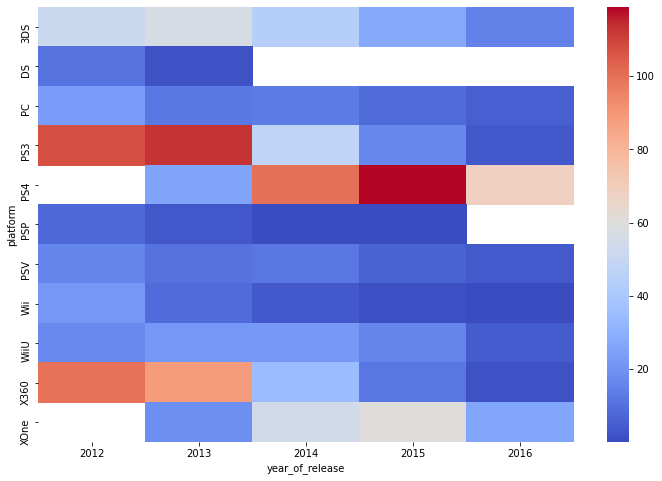

In [39]:
# Тепловая карта выручки в разрезе платформ по годам за актуальный период
games_act_sns = games_act.pivot_table(index='platform', columns = 'year_of_release', values='total_sales', aggfunc='sum')
plt.figure(figsize = (12,8))
sns.heatmap(games_act_sns, cmap = 'coolwarm');

#annot = True


К 2016 году полностью выбыли из игры (какой неловкий каламбур) DS и PSP.  
Лидерами в 2015-2016 гг оказались PS4, 3DS, Xone, но 3DS  в последние годы стабильно падает по выручке.  
Также уменьшается выручка по PS3 и X360.
Остальные платформы имеют меньшую выручку, но они стабильны.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

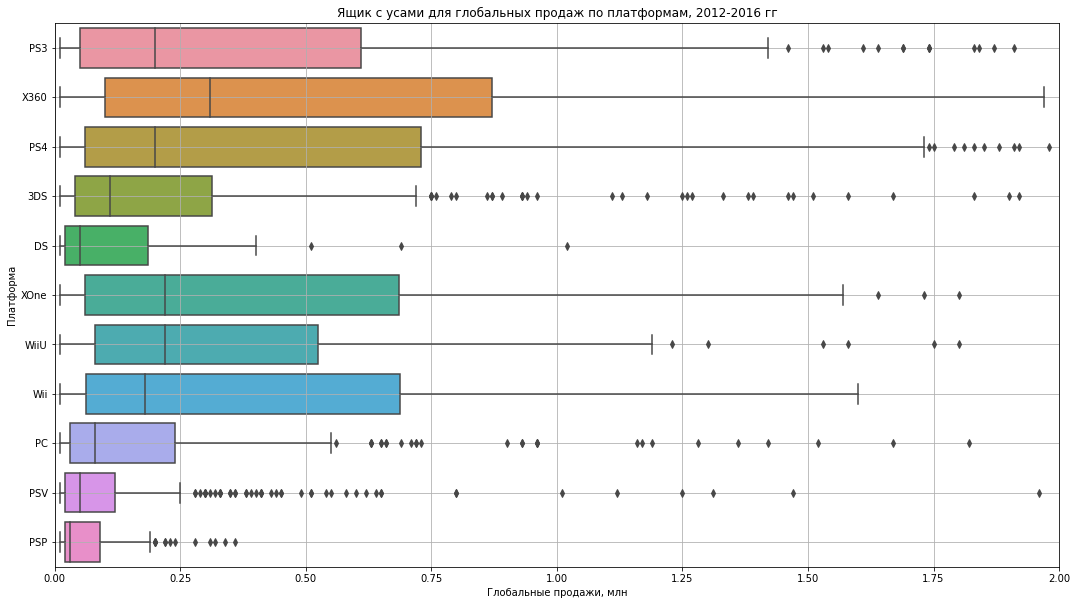

In [40]:
plt.subplots(figsize=(18,10))
sns.boxplot(y="platform", x="total_sales", data=games_act, orient="h")
plt.grid()
plt.xlim(0,2)
plt.title('Ящик с усами для глобальных продаж по платформам, 2012-2016 гг')
plt.xlabel('Глобальные продажи, млн', fontsize=10)
plt.ylabel('Платформа',fontsize=10);

По ящику с усами видно, что нормальные значения выше 1,75 млн только у X360, у него же самые высокие показатели 3 квартиля (выше 0.75 млн) и медианы (выше 0.25 млн). Выбросов в пределах 2 млн не наблюдается.
Также высокие значения в пределах нормальных (диапазон 1.5 млн - 1.75 млн) у Wii, XOne, PS4. По показателям 3 квартиля (0.5-0.75 млн) и медианы (выше 0.15 млн) к ним присоединяются WiiU, PS3. Выбросов в диапазоне 2 млн нет у Wii, а у остальных "выстреливают" только некоторые игры.


### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [41]:
# создадам отдельный дф для PS4
ps4_corr = games_act[games_act['platform'] == 'PS4']
columns = ['user_score', 'critic_score', 'total_sales']


In [42]:
# посчитаем корреляцию между выручкой и оценками для PS4
ps4_corr[columns].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


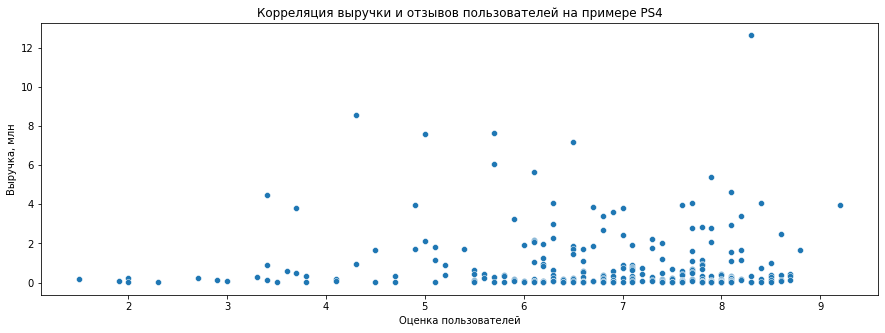

In [43]:
# построим график взаимосвязи выручки и оценки пользователей для PS4
plt.figure(figsize=(15,5))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_corr)
plt.title('Корреляция выручки и отзывов пользователей на примере PS4')
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

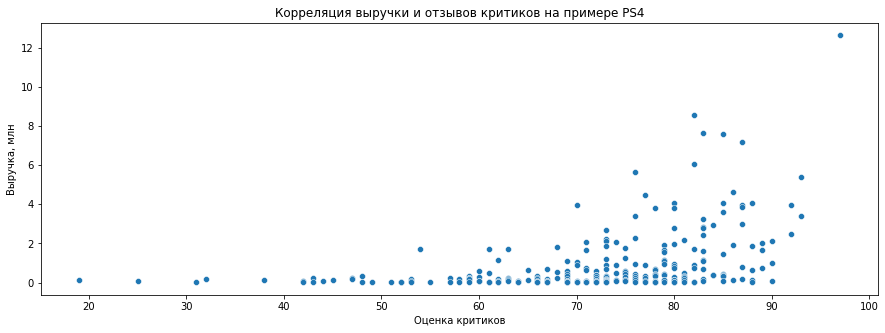

In [44]:
# построим график взаимосвязи выручки и оценки критиков для PS4
plt.figure(figsize=(15,5))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_corr)
plt.title('Корреляция выручки и отзывов критиков на примере PS4')
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

Коэффициент корреляции выручки с оценкой критиков равен 0,4 - невысокий показатель. Игры, приносящие наибольшую выручку, получают оценку критиков выше 60 сразбросом до 90. 

А с оценкой пользователей коэффциент отрицательный, равен -0.03. Слишком маленькая связь, чтобы говорить об обратной. Основная выручка приходится на оценку выше 5.5. Здесь могло сыграть свою роль отсутствие оценок у многих игр - вероятно, у плохо продающихся игр ее нет.

### Соотнесем выводы с продажами игр на других платформах.

,user_score,critic_score,total_sales
user_score,1.000000,0.816295,0.296197
critic_score,0.816295,1.000000,-0.424341
total_sales,0.296197,-0.424341,1.000000


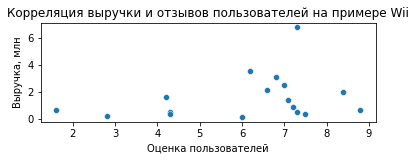

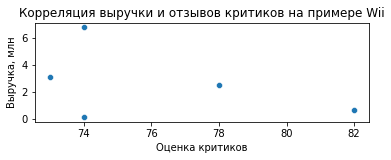

In [45]:
# повторим шаги для Wii
wii_corr = games_act[games_act['platform'] == 'Wii']
columns = ['user_score', 'critic_score', 'total_sales']

display(wii_corr[columns].corr())


plt.subplot(2, 1, 1)
sns.scatterplot(x='user_score', y='total_sales', data=wii_corr)

plt.title('Корреляция выручки и отзывов пользователей на примере Wii')
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()


plt.subplot(2, 1, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=wii_corr)

plt.title('Корреляция выручки и отзывов критиков на примере Wii')
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()

На Wii очень мало оценок, чтобы адекватно оценивать корреляцию, но она все еще невысокая - 0.3 с пользователями и -0.4 с критиками

,user_score,critic_score,total_sales
user_score,1.000000,0.557352,0.006164
critic_score,0.557352,1.000000,0.360573
total_sales,0.006164,0.360573,1.000000


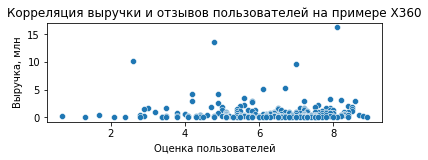

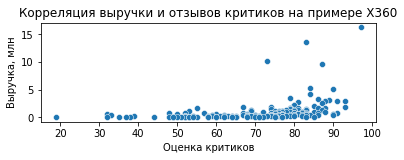

In [46]:
# повторим шаги для X360
x360_corr = games_act[games_act['platform'] == 'X360']
columns = ['user_score', 'critic_score', 'total_sales']

display(x360_corr[columns].corr())


plt.subplot(2, 1, 1)
sns.scatterplot(x='user_score', y='total_sales', data=x360_corr)

plt.title('Корреляция выручки и отзывов пользователей на примере X360')
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()


plt.subplot(2, 1, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=x360_corr)

plt.title('Корреляция выручки и отзывов критиков на примере X360')
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()

На X360 отсутствует линейная корреляция с оценками пользователей (0.0) и невысокая с оценками критиков (0.4).

,user_score,critic_score,total_sales
user_score,1.000000,0.722762,0.197583
critic_score,0.722762,1.000000,0.320803
total_sales,0.197583,0.320803,1.000000


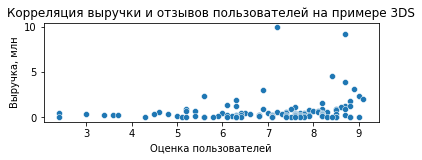

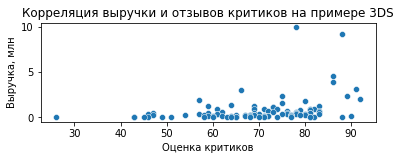

In [47]:
# повторим шаги для 3DS
_3ds_corr = games_act[games_act['platform'] == '3DS']
columns = ['user_score', 'critic_score', 'total_sales']

display(_3ds_corr[columns].corr())


plt.subplot(2, 1, 1)
sns.scatterplot(x='user_score', y='total_sales', data=_3ds_corr)

plt.title('Корреляция выручки и отзывов пользователей на примере 3DS')
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()


plt.subplot(2, 1, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=_3ds_corr)

plt.title('Корреляция выручки и отзывов критиков на примере 3DS')
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()

На 3DS коэффициент корреляции 0.2 со зрительскими оценками и 0.3 с оценками критиков.

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


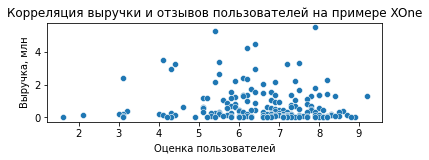

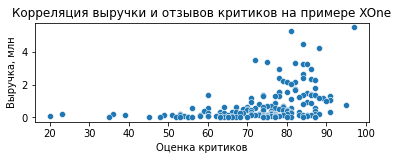

In [48]:
# повторим шаги для XOne
xone_corr = games_act[games_act['platform'] == 'XOne']
columns = ['user_score', 'critic_score', 'total_sales']

display(xone_corr[columns].corr())


plt.subplot(2, 1, 1)
sns.scatterplot(x='user_score', y='total_sales', data=xone_corr)

plt.title('Корреляция выручки и отзывов пользователей на примере XOne')
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()


plt.subplot(2, 1, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=xone_corr)

plt.title('Корреляция выручки и отзывов критиков на примере XOne')
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Выручка, млн',fontsize=10);

plt.show()

На XOne нет линейной корреляции с оценками пользователей (0.1), невысокая с оценками критиков (0.4)

Сравнивая корреляцию по PS4 с другими платформами - Wii, X360, 3DS, XOne, можно сделать вывод:
несмотря на свое положение - убывающее или возрастающее, стабильно высокое по выручке от игр или с выбросами - наблюдается низкая корреляция выручки с оценками критиков (0.3-0.4) и нет линейной связи с оценкой пользователей (-0.3, 0, 0.2).

Выходит, пользователи ориентируются при покупке не столько на оценку других людей, сколько на свой вкус и другие требования. А вот их собственная оценка после покупки (даже низкая) уже не отменит факт полученной платформой выручки.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

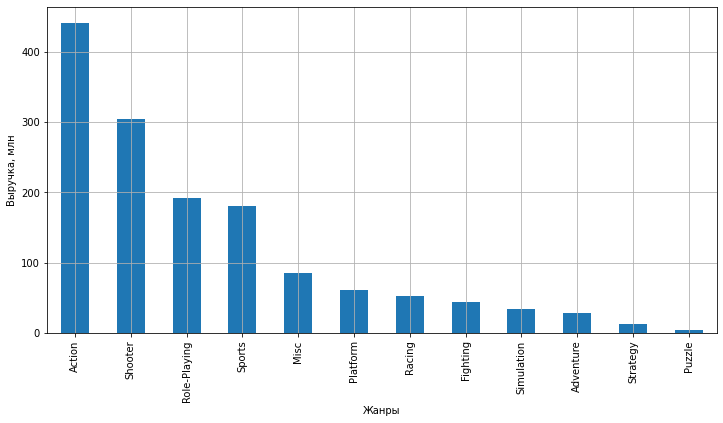

In [49]:
(games_act
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(12, 6), legend=False, grid=True)
 .set(xlabel='Жанры', ylabel='Выручка, млн'))

plt.show()

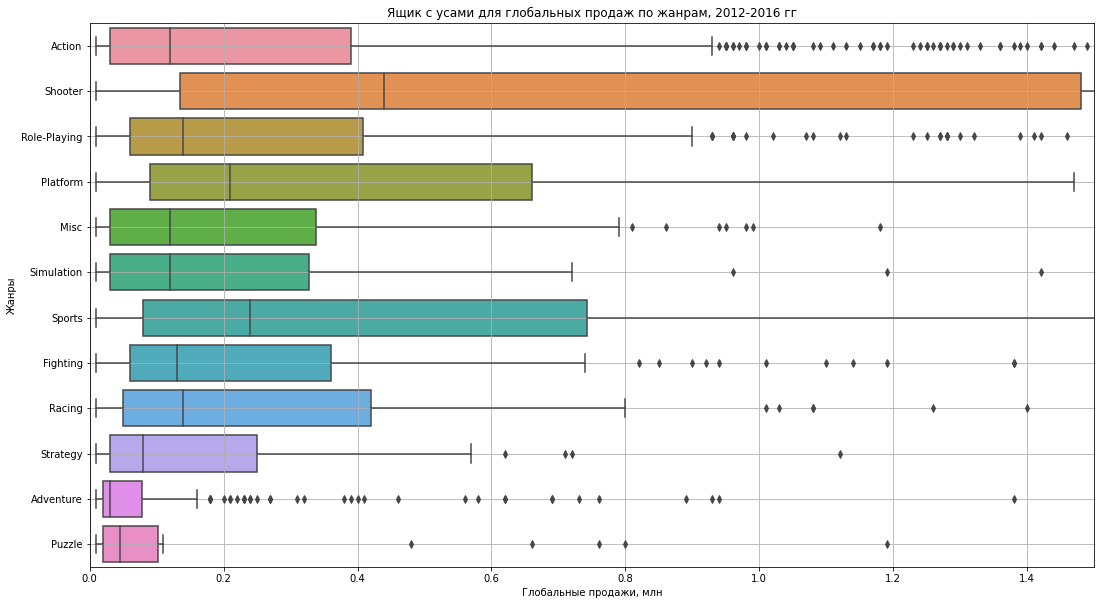

In [50]:
plt.subplots(figsize=(18,10))
sns.boxplot(y="genre", x="total_sales", data=games_act, orient="h")
plt.grid()
plt.xlim(0,1.5)
plt.title('Ящик с усами для глобальных продаж по жанрам, 2012-2016 гг')
plt.xlabel('Глобальные продажи, млн', fontsize=10)
plt.ylabel('Жанры',fontsize=10);

In [51]:
games_per_genres = (games_act
                    .pivot_table(index='name', columns = 'genre', values='total_sales', aggfunc='mean')
                    .describe().T
                   )
games_per_genres


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,574.0,0.306299,0.740127,0.01,0.02500,0.071250,0.26000,11.316
Adventure,216.0,0.080901,0.195441,0.01,0.02000,0.030000,0.06000,1.660
Fighting,61.0,0.338224,0.812373,0.01,0.05000,0.130000,0.33000,6.210
Misc,130.0,0.301691,0.659850,0.01,0.03000,0.080000,0.26750,4.420
Platform,46.0,1.012724,1.753497,0.01,0.09125,0.256667,1.29625,9.900
Puzzle,23.0,0.199565,0.332405,0.01,0.02000,0.035000,0.10500,1.190
Racing,48.0,0.624976,1.185133,0.01,0.05000,0.186667,0.58625,7.090
Role-Playing,265.0,0.520619,1.420783,0.01,0.06000,0.130000,0.38000,14.600
Shooter,95.0,1.154621,1.711616,0.01,0.11250,0.416667,1.38500,9.710


Наибольший доход в период 2012-2016 гг принесли жанры action (более 400 млн) и shooter (более 300 млн). Наименьшая выручка от жанров adventure, strategy, puzzle - менее 50 млн у каждого. 

Однако по графику можно заметить, что в жанре экшн много выбросов среди 574 игр, средняя равна 0.31 млн, а медиана еще меньше - 0.07 млн. При этом у игр-шутеров, которых в выборке только 95 штук, показатели нормальные в пределах 1.5 млн, средние значения равны 1.15 млн, медиана - 0.42 млн, что выглядит намного привлекательнее. Также неплохие показатели у платформ (средняя 1.01, медиана 0.26 млн) и спортивных (средняя 0.52, медиана 0.29 млн).

А вот медиана игр с небольшой выручкой не так уж отличается от action: adventure - 0.03 млн, strategy - 0.06 млн, puzzle - 0.04 млн.

### **Выводы по разделу 3**

1. Наибольший выпуск игр приходится на период 2006 - 2010 гг. Потом у пользователей появились фавориты, для которых стали выпускать обновления, а новых игр стали придумывать меньше.

2. Платформа устаревает за 9-11 лет. Пиковые показатели приходятся на 4-6-й год существования.  
Для дальнейшего анализа использованы данные за 2012-2016 гг.

3. К 2016 году полностью выбыли из игры (какой неловкий каламбур) DS и PSP.  
Лидерами в 2015-2016гг оказались PS4, 3DS, Xone, но 3DS в последние годы стабильно падает по выручке.  
Также уменьшается выручка по PS3 и X360. Остальные платформы имеют стабильно небольшую выручку.

4. Несмотря на свое положение - убывающее или возрастающее, стабильно высокое по выручке от игр или с выбросами - наблюдается низкая корреляция выручки с оценками критиков (0.3-0.4) и нет линейной связи с оценкой пользователей (колеблется от -0.3 до 0.2).

5. Наибольший доход в период 2012-2016 гг принесли жанры action (более 400 млн) и shooter (более 300 млн). Наименьшая выручка от жанров adventure, strategy, puzzle - менее 50 млн у каждого.  
Однако экшн держится на большом выпуске игр, из которых бОльшую сумму выручки приносят лишь отдельные раскрученные продукты (средняя равна 0.31 млн, медиана - 0.07 млн). В среднем, более выгодными оказываются игры из жанра шутеров (1.15 млн), также неплохие показатели у платформ (средняя 1.01 млн) и спортивных игр (средняя 0.52 млн).


## Портрет пользователя каждого региона (NA, EU, JP)

In [52]:
# функция для сводных таблиц выручки по регионам
def top5_per_region(column, region):
    return (games_act
        .pivot_table(index=column, values=region, aggfunc='sum')
        
        .sort_values(by=region, ascending=False).head()
    )

In [53]:
# функция для построения столбчатой диаграммы
def bar_for_region(df, name, region):
    (df.plot(
        kind='bar',
        y=region, 
        legend=False,  
        figsize=(12,6),
        title=name,
        xlabel='Платформы', ylabel='Выручка, млн')
    )
    plt.show()
    
    

In [54]:
# функция для построения круговой диаграммы
def pie_for_region(df, name, region):
    (df.plot(
        subplots=True,
        kind='pie',
        y=region, 
        legend=False, 
        autopct='%1.0f%%', 
        figsize=(12,6),
        title=name))
    plt.show()

### Рассмотрим продажи по регионам в разрезе 5 наиболее популярных платформ

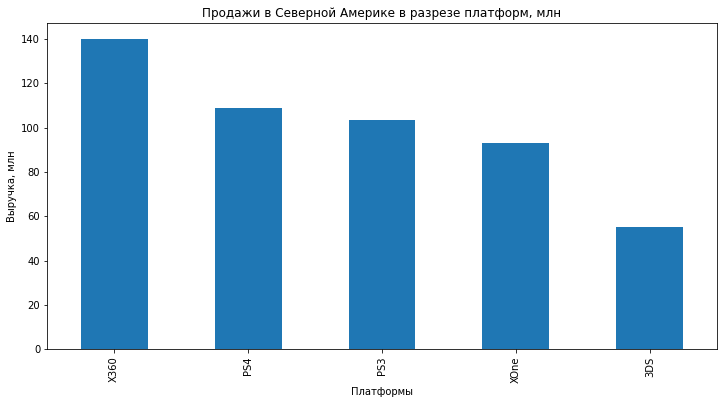

None

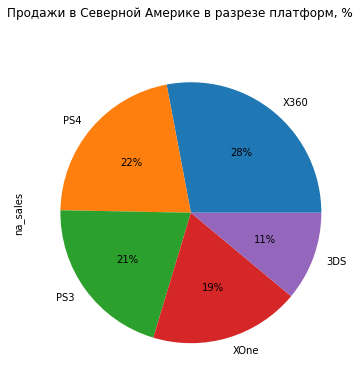

In [55]:
# Самые популярные платформы (топ-5) в Северной Америке
display(bar_for_region(top5_per_region('platform', 'na_sales'), 'Продажи в Северной Америке в разрезе платформ, млн', 'na_sales'))
pie_for_region(top5_per_region('platform', 'na_sales'), 'Продажи в Северной Америке в разрезе платформ, %', 'na_sales')

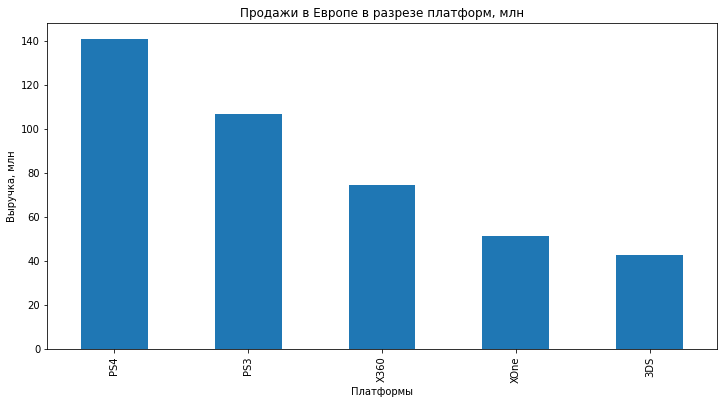

None

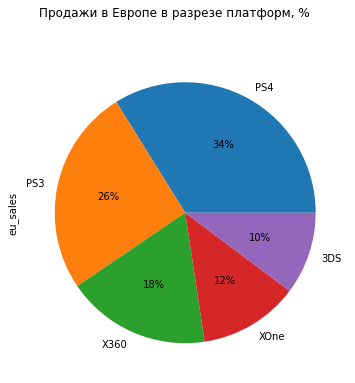

In [56]:
# Самые популярные платформы (топ-5) в Европе
display(bar_for_region(top5_per_region('platform', 'eu_sales'), 'Продажи в Европе в разрезе платформ, млн', 'eu_sales'))
pie_for_region(top5_per_region('platform', 'eu_sales'), 'Продажи в Европе в разрезе платформ, %', 'eu_sales')

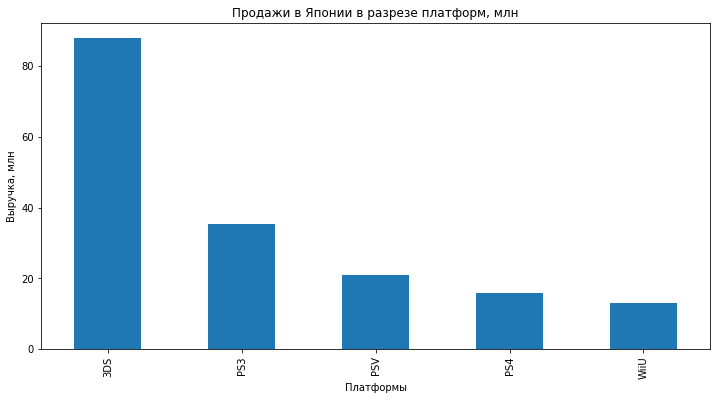

None

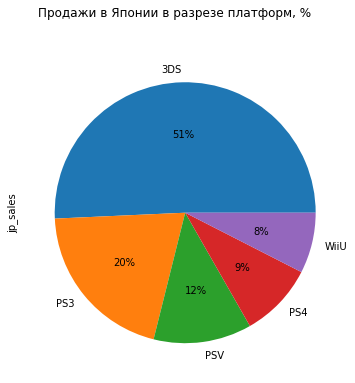

In [57]:
# Самые популярные платформы (топ-5) в Японии
display(bar_for_region(top5_per_region('platform', 'jp_sales'), 'Продажи в Японии в разрезе платформ, млн', 'jp_sales'))
pie_for_region(top5_per_region('platform', 'jp_sales'), 'Продажи в Японии в разрезе платформ, %', 'jp_sales')

В Северной Америке наиболее популярная платформа - X360 (28%).
В Европе - PS4 (34%).
В Японии - 3DS (51%).

При этом пятерка лучших в Северной Америке и Европе совпадает - X360, PS4, PS3, XOne, 3ds.  А PS4 и 3DS в совокупности захватывают 50% от выручки пятерки лучших.  

В Японии продукция Microsoft игнорируется в пользу местных платформ - PSV и WiiU. Да и в целом ничего, кроме Nintendo и PlayStation, в 5-ку не пробилось.


### Рассмотрим продажи по регионам в разрезе 5 наиболее популярных жанров

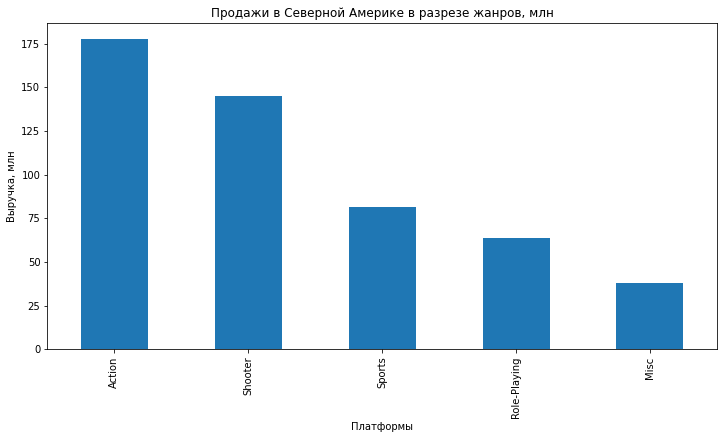

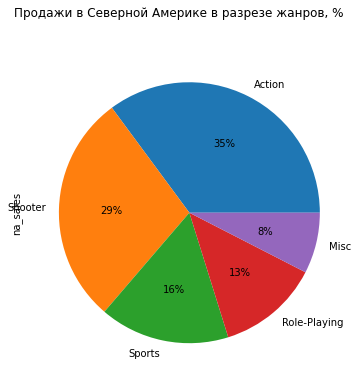

In [58]:
# Самые популярные жанры (топ-5) в Северной Америке
bar_for_region(top5_per_region('genre', 'na_sales'), 'Продажи в Северной Америке в разрезе жанров, млн', 'na_sales')
pie_for_region(top5_per_region('genre', 'na_sales'), 'Продажи в Северной Америке в разрезе жанров, %', 'na_sales')

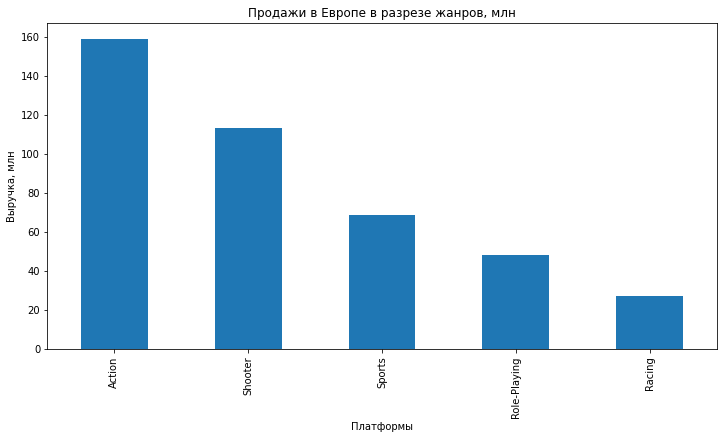

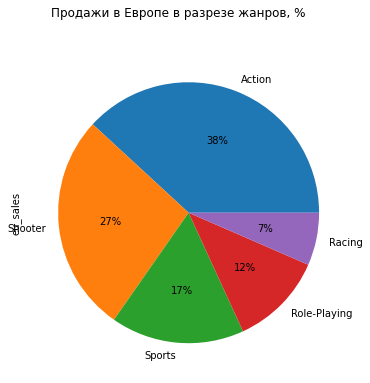

In [59]:
# Самые популярные жанры (топ-5) в Европе
bar_for_region(top5_per_region('genre', 'eu_sales'), 'Продажи в Европе в разрезе жанров, млн', 'eu_sales')
pie_for_region(top5_per_region('genre', 'eu_sales'), 'Продажи в Европе в разрезе жанров, %', 'eu_sales')

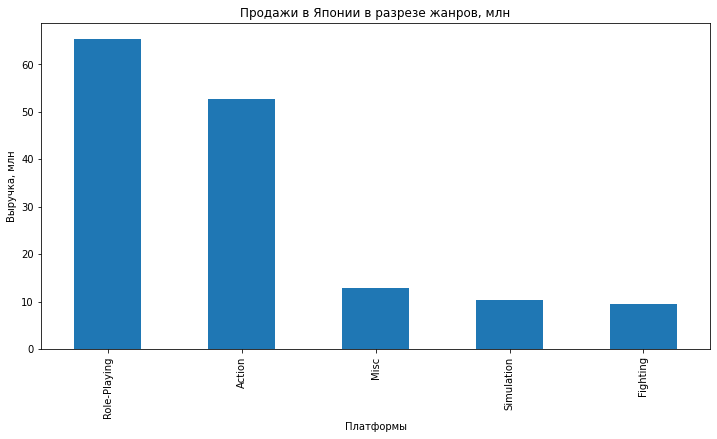

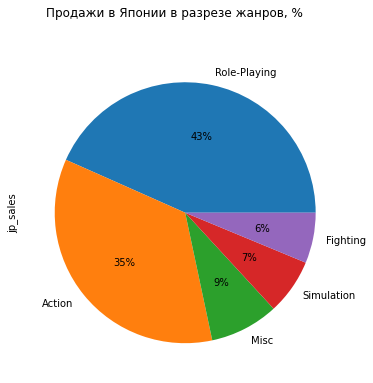

In [60]:
# Самые популярные жанры (топ-5) в Японии
bar_for_region(top5_per_region('genre', 'jp_sales'), 'Продажи в Японии в разрезе жанров, млн', 'jp_sales')
pie_for_region(top5_per_region('genre', 'jp_sales'), 'Продажи в Японии в разрезе жанров, %', 'jp_sales')

Action - наиболее популярный жанр в Северной Америке (35%) и в Европе (38%). 
Role-Playing - наиболее популярен в Японии (43%). Но в абсолютной величине продажи в этом жанре в каждом регионе находятся в районе 50-60 млн за рассматриваемый период. 

### Рассмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

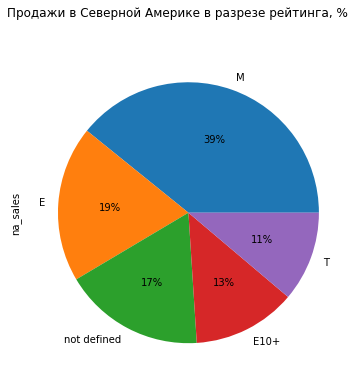

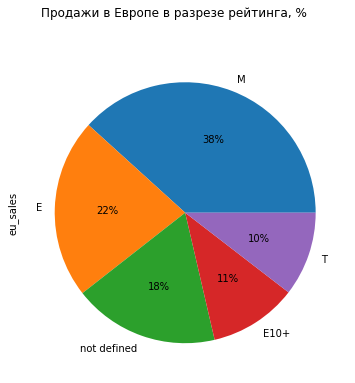

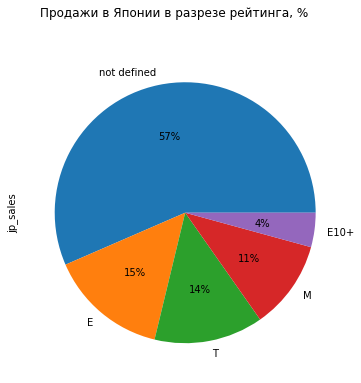

In [61]:
pie_for_region(top5_per_region('rating', 'na_sales'), 'Продажи в Северной Америке в разрезе рейтинга, %', 'na_sales')
pie_for_region(top5_per_region('rating', 'eu_sales'), 'Продажи в Европе в разрезе рейтинга, %', 'eu_sales')
pie_for_region(top5_per_region('rating', 'jp_sales'), 'Продажи в Японии в разрезе рейтинга, %', 'jp_sales')

В Северной Америке и Европе предпочитают игры для взрослых - 39% и 38% соответственно.

В Японии для большинства игр рейтинг ESRB не определен (57%) - подтверждается предположение о том, что там используются свои стандарты. Существенную долю (почти 30%) в пятерке наиболее популярных рейтингов занимают "Для всех" и "Для подростков".

### **Выводы по разделу 4**

Картина по популярным платформам, жанрам и рейтингам весьма похожа в Северной Америке и в Европе, но сильно отличается от Японии.
1. В Северной Америке наиболее популярная платформа - X360 (28%). В Европе - PS4 (34%). В Японии - 3DS (51%).

2. Наиболее популярный жанр в Северной Америке (35%) и в Европе (38%) - Action (что совпадает с общим выводом). 
В Японии наиболее популярен (43%) Role-Playing . Но в абсолютной величине продажи в этом жанре в каждом регионе находятся в районе 50-60 млн за рассматриваемый период. 

3. В Северной Америке и Европе предпочитают игры для взрослых - 39% и 38% соответственно.  
В Японии действуют региональные стандарты и, поскольку наиболее популярны местные платформы, для большинства игр рейтинг ESRB не определен (57%). Также большую часть в нише занимают игры для подростков и младше.

## Проверим гипотезы

### №1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [62]:
# создадим отдельные дф для проверямых платформ
pc_act = games_act[games_act['platform'] == 'PC']['user_score'].dropna() 
xone_act = games_act[games_act['platform'] == 'XOne']['user_score'].dropna()

In [63]:
# посчитаем дисперсию для получившихся выборок
display(np.var(pc_act))
np.var(xone_act)

2.7569952398906588

1.8965188383045526

In [64]:
# Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются
# Поскольку мы проверяем двустороннюю гипотезу о равенстве средних двух генеральных совокупностей,
# лучше всего использовать специальный метод Python - ttest_ind

# поскольку дисперсии различаются, укажем параметр equal_var=False

alpha = 0.05
 
results = st.ttest_ind(pc_act, xone_act, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')
    


p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу.


Гипотетически, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### №2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [65]:
# создадим отдельные дф для проверямых платформ
action = games_act[games_act['genre'] == 'Action']['user_score'].dropna() 
sports = games_act[games_act['genre'] == 'Sports']['user_score'].dropna()


In [66]:
# посчитаем дисперсию для получившихся выборок
display(np.var(action))
np.var(sports)

1.8854720340439224

3.0073882971729127

In [67]:
# Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
# Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются

# Поскольку мы проверяем двустороннюю гипотезу о равенстве средних двух генеральных совокупностей,
# лучше всего использовать специальный метод Python - ttest_ind

# поскольку дисперсии различаются, укажем параметр equal_var=False

alpha = 0.05
 
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу.


Гипотетически, средние пользовательские рейтинги жанров Action и Sports различаются.

### **Выводы по разделу 5**

Проверили гипотезы и не смогли отвергуть:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки гипотез использовался метод Python - ttest_ind, поскольку сравнивалось равенство двух генеральных совокупностей.

В качестве нулевой гипотезы выступает, по обыкновению, равенство средних, в качестве альтернативной рассматривалось их различие, независимо от того, чей средний рейтинг выше.

# Общий вывод 

**1. Провели преобработку данных:**
- Привели наименования столбцов к нижнему регистру.  
- Удалили строки с пустыми значениями по столбцам name и genre.   
- Удалили строки с отсутствующим годом релиза и перевели значения в целочисленные в year_of_release. 
- Заменили значение 'tbd' на Nan в user_score. Формат данных изменили на вещественный.  
- Пропуски в rating заменили на значение not defined.  
- Дубликаты не обнаружены.  
- Добавили столбец с суммарной выручкой total_sales.  


**2. Провели исследовательский анализ данных:**
- Наибольший выпуск игр приходится на период 2006 - 2010 гг. Потом у пользователей появились фавориты, для которых стали выпускать обновления, а новых игр стали придумывать меньше.  
- Платформа устаревает за 9-11 лет. Пиковые показатели приходятся на 4-6-й год существования. Для дальнейшего анализа использованы данные за 2012-2016 гг.  
- К 2016 году полностью перестали выпусскать игры DS и PSP. Лидерами в 2015-2016 гг оказались PS4, 3DS, Xone, но 3DS в последние годы стабильно падал по выручке. Также уменьшается выручка по PS3 и X360. Остальные платформы имеют стабильно небольшую выручку.
- Наблюдается низкая корреляция выручки с оценками критиков (0.3-0.4) и нет линейной связи с оценкой пользователей (колеблется от -0.3 до 0.2) по рассмотренным платформам ( PS4, Wii, X360, 3DS, XOne,).
- Наибольший доход в период 2012-2016 гг принесли жанры action (более 400 млн) и shooter (более 300 млн). Наименьшая выручка от жанров adventure, strategy, puzzle - менее 50 млн у каждого. Однако если рассматривать средние показатели, у экшн средняя равна 0.31 млн и более выгодными оказываются игры из жанра шутеров (1.15 млн), а также платформы (1.01 млн) и спортивные игры (средняя 0.52 млн). Экшн может рассчитывать на большую выручку для дорогой продукции с большой маркетинговой компанией.

**3. Составили портрет пользователя каждого региона:**
- Картина по популярным платформам, жанрам и рейтингам весьма похожа в Северной Америке и в Европе, но сильно отличается от Японии.
- В Северной Америке наиболее популярная платформа - X360 (28%). В Европе - PS4 (34%). В Японии - 3DS (51%).
- Наиболее популярный жанр в Северной Америке (35%) и в Европе (38%) - Action. На втором месте - Shooter (29% и 27%)
В Японии наиболее популярен (43%) Role-Playing . Но в абсолютной величине продажи в этом жанре в каждом регионе находятся в районе 50-60 млн за рассматриваемый период. 
- В Северной Америке и Европе предпочитают игры для взрослых - 39% и 38% соответственно. В Японии действуют региональные стандарты и, поскольку наиболее популярны местные платформы, для большинства игр рейтинг ESRB не определен (57%). Также большую часть в нише занимают игры для подростков и младше.

**4. Проверили гипотезы и не смогли отвергуть:**

№1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
№2 Средние пользовательские рейтинги жанров Action и Sports различаются.  

Для проверки гипотез использовался метод Python - ttest_ind, поскольку сравнивалось равенство двух генеральных совокупностей.

**Резюме:**

При выборе жанра игры и платформы необходимо помнить о различиях покупательского портрета Северной Америки и Европы от Японии.  
Везде стабильно высокая выручка от продаж игр в жанре RPG, но при ориентации на западные страны стоит отдать предпочтение жанрам action и shooter.  
Пользовательские оценки на консолях и ПК в среднем могут не отличаться, но бОльшая часть выручки приходится на приставки, среди которых необходимо обратить внимание на PS4 и X360.  
Наиболее платежеспособная часть населения предпочитает игры для взрослых, но также спонсирует хобби подростков в соответствующих возрастных рейтингах - от 13 лет и старше.